In [2]:
import numpy as np
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
las=lasio.read("HRA digits.las")
las2=lasio.read("Processed_ShaleOilElan.las")
las3=lasio.read("RQL.las")

In [7]:
df_hra = las.df()
df_elan = las2.df()
df_rql=las3.df()

In [8]:
def tms(df,form_top,form_bottom):
    df_tms=df[form_top:form_bottom]
    return df_tms

## RQ clusters

In [9]:
#df_rq=df_elan.loc[:,["PIGT","SUWI","VCHL","VILL","VMON","VQUA","VPYR","VCLC","VSM1","VXBW","VUOI","VUWA","VMHY","VXWA"]]
df_rq=df_elan.loc[:,["PIGN","SUWI","VCL","VQUA","VCLC","VSM1","VUOI","VUWA","KINT"]]

In [10]:
# df_rq["Clays"]=df_rq["VCHL"]+df_rq["VILL"]+df_rq["VMON"]
# df_rq

In [11]:
df_rq.reset_index(inplace=True)
df_rq.head()

,DEPT,PIGN,SUWI,VCL,VQUA,VCLC,VSM1,VUOI,VUWA,KINT
0,14000.0,0.039886,1.0,0.103338,0.170778,0.685815,0.0,0.0,0.039886,0.001
1,14000.5,0.040284,1.0,0.093419,0.180527,0.685597,0.0,0.0,0.040284,0.001
2,14001.0,0.041550,1.0,0.092012,0.198939,0.667331,0.0,0.0,0.041550,0.001
3,14001.5,0.045538,1.0,0.100856,0.180361,0.673088,0.0,0.0,0.045538,0.001
4,14002.0,0.048106,1.0,0.114272,0.176156,0.661335,0.0,0.0,0.048106,0.001


In [12]:
# cols = ['Depth','Total porosity','Water saturation','Chlorite','Illite','Montmorillinite','Quartz',
#         'Pyrite','Calcite','Kerogen','Bound water','Oil','Water','Moved hydrocarbon','Moved water','Clays']

cols = ['Depth','Effective porosity','Water saturation','Total clay','Quartz',
        'Calcite','Kerogen','Oil','Water','Absolute permeability']
df_rq.columns=cols

In [13]:
df_rq

,Depth,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water,Absolute permeability
0,14000.0,0.039886,1.000000,0.103338,0.170778,0.685815,0.0,0.000000,0.039886,0.001
1,14000.5,0.040284,1.000000,0.093419,0.180527,0.685597,0.0,0.000000,0.040284,0.001
2,14001.0,0.041550,1.000000,0.092012,0.198939,0.667331,0.0,0.000000,0.041550,0.001
3,14001.5,0.045538,1.000000,0.100856,0.180361,0.673088,0.0,0.000000,0.045538,0.001
4,14002.0,0.048106,1.000000,0.114272,0.176156,0.661335,0.0,0.000000,0.048106,0.001
...,...,...,...,...,...,...,...,...,...,...
3056,15528.0,0.029495,0.744761,0.333084,0.472741,0.164680,0.0,0.007528,0.021967,0.001
3057,15528.5,0.028624,0.817852,0.322021,0.481657,0.167698,0.0,0.005214,0.023410,0.001
3058,15529.0,0.024983,0.939310,0.312355,0.491589,0.171074,0.0,0.001516,0.023466,0.001
3059,15529.5,0.021285,1.000000,0.306691,0.498574,0.173449,0.0,0.000000,0.021285,0.001


## TMS interval

In [14]:
df_tms=df_rq.loc[(df_rq['Depth'] >= 15042) & (df_rq['Depth'] <= 15250)]

In [15]:
df_tms.describe()

,Depth,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water,Absolute permeability
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,15146.000000,0.041225,0.491193,0.447962,0.404645,0.095938,0.009723,0.021507,0.019716,0.000238
std,60.260891,0.020723,0.244176,0.065648,0.075515,0.091201,0.011064,0.012556,0.014742,0.000381
min,15042.000000,0.000100,0.091336,0.298057,0.205293,0.000216,0.000000,0.000000,0.000010,0.000000
25%,15094.000000,0.031561,0.292157,0.398372,0.346245,0.010874,0.000000,0.012055,0.009619,0.000000
50%,15146.000000,0.040887,0.450147,0.441981,0.415180,0.076421,0.006407,0.022332,0.016655,0.000045
75%,15198.000000,0.051589,0.660826,0.495962,0.459168,0.153682,0.014953,0.030160,0.028476,0.000190
max,15250.000000,0.117628,1.000000,0.613700,0.580037,0.396921,0.052160,0.064128,0.066021,0.001000


In [16]:
#df_tms.loc[df_tms[df_tms["Water saturation"]==1].index,"Water saturation"]=np.nan

In [17]:
#df_tms.describe()

In [18]:
#df_tms.dropna(inplace=True)

In [19]:
df_tms.reset_index(drop=True,inplace=True)
df_tms.head()

,Depth,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water,Absolute permeability
0,15042.0,0.092029,0.717390,0.451053,0.424014,0.002611,0.029271,0.026008,0.066021,0.000025
1,15042.5,0.089064,0.728874,0.446700,0.430479,0.002460,0.030335,0.024147,0.064916,0.000005
2,15043.0,0.098539,0.663872,0.482556,0.383747,0.002765,0.031310,0.033122,0.065417,0.000102
3,15043.5,0.095746,0.631517,0.504523,0.368047,0.002808,0.027776,0.035281,0.060465,0.000125
4,15044.0,0.093132,0.670756,0.464357,0.408311,0.002645,0.030519,0.030663,0.062469,0.000075


## DBSCAN

Text(0, 0.5, 'Feature 1')

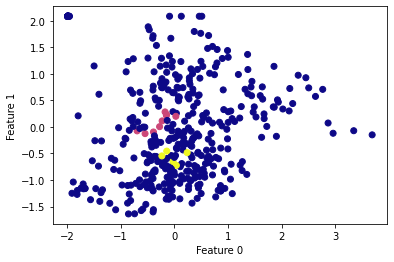

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X=df_tms[['Effective porosity','Water saturation','Total clay','Quartz',
        'Calcite','Kerogen','Oil','Water','Absolute permeability']]
X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples = 5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [21]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## K-Means

In [22]:
from sklearn.cluster import KMeans
X=df_tms[['Effective porosity','Water saturation','Total clay','Quartz',
        'Calcite','Kerogen','Oil','Water']]
X['Water saturation mod']=1/X['Water saturation']
X['Total clay mod']=1/X['Total clay']
X=X[['Effective porosity','Water saturation mod','Total clay mod','Quartz',
        'Calcite','Kerogen','Oil','Water']]

X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<ipython-input-22-2da5b4886543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Water saturation mod']=1/X['Water saturation']


Text(0, 0.5, 'Feature 1')

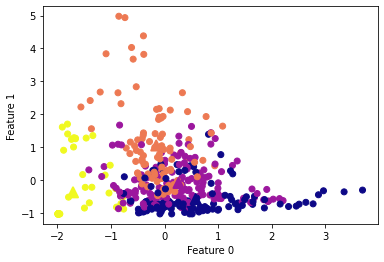

In [23]:
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2,3], 
            s=100, 
            linewidth=2,
            cmap="plasma")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [24]:
df_rq_cluster=pd.concat([df_tms,pd.DataFrame({'RQ':y_kmeans})],axis=1)
df_rq_cluster

,Depth,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water,Absolute permeability,RQ
0,15042.0,0.092029,0.717390,0.451053,0.424014,0.002611,0.029271,0.026008,0.066021,0.000025,0
1,15042.5,0.089064,0.728874,0.446700,0.430479,0.002460,0.030335,0.024147,0.064916,0.000005,0
2,15043.0,0.098539,0.663872,0.482556,0.383747,0.002765,0.031310,0.033122,0.065417,0.000102,0
3,15043.5,0.095746,0.631517,0.504523,0.368047,0.002808,0.027776,0.035281,0.060465,0.000125,0
4,15044.0,0.093132,0.670756,0.464357,0.408311,0.002645,0.030519,0.030663,0.062469,0.000075,0
...,...,...,...,...,...,...,...,...,...,...,...
412,15248.0,0.021485,0.411626,0.439464,0.537865,0.000866,0.000000,0.012641,0.008844,0.001000,1
413,15248.5,0.023843,0.475555,0.482920,0.492087,0.000900,0.000000,0.012505,0.011339,0.001000,1
414,15249.0,0.025213,0.645601,0.479386,0.494294,0.000896,0.000000,0.008936,0.016278,0.001000,1
415,15249.5,0.023388,0.791904,0.443897,0.531414,0.001069,0.000000,0.004867,0.018521,0.001000,1


In [25]:
df_rq_cluster["RQ"].value_counts()

1    149
0    117
2     98
3     53
Name: RQ, dtype: int64

In [26]:
def rq_props(df,i):
    df_rq=df[df["RQ"]==i]
    return df_rq[['Effective porosity','Water saturation','Total clay',
                  'Quartz','Calcite','Kerogen','Oil','Water']].describe()

In [27]:
rq_props(df_rq_cluster,0)

,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.053187,0.645112,0.396549,0.466578,0.060430,0.022679,0.019289,0.033898
std,0.019143,0.189783,0.044328,0.051657,0.050522,0.010982,0.013032,0.014140
min,0.025387,0.199716,0.298057,0.317706,0.001251,0.000000,0.000000,0.008936
25%,0.039348,0.532120,0.370804,0.434335,0.014933,0.013689,0.010971,0.024568
50%,0.048388,0.670756,0.389972,0.466619,0.052374,0.021901,0.015247,0.030481
75%,0.062913,0.769702,0.420025,0.505556,0.101664,0.029271,0.027737,0.045534
max,0.117628,1.000000,0.508358,0.580037,0.180063,0.052160,0.064128,0.066021


In [28]:
rq_props(df_rq_cluster,1)

,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.046568,0.439126,0.503172,0.416910,0.028046,0.004676,0.025871,0.020697
std,0.015355,0.140574,0.045023,0.052276,0.035474,0.005125,0.009904,0.010404
min,0.011949,0.182789,0.410713,0.311725,0.000216,0.000000,0.004867,0.003716
25%,0.035169,0.326673,0.472559,0.387777,0.001814,0.000000,0.018064,0.013313
50%,0.047584,0.438666,0.504545,0.424196,0.010249,0.003343,0.025950,0.018876
75%,0.054526,0.543656,0.534941,0.451039,0.043876,0.008597,0.033422,0.025552
max,0.086948,0.791904,0.613700,0.537865,0.138464,0.019032,0.050325,0.052057


In [29]:
rq_props(df_rq_cluster,2)

,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.037963,0.267330,0.427903,0.334063,0.192416,0.007167,0.027479,0.010485
std,0.009859,0.105392,0.051522,0.060865,0.065745,0.006423,0.007609,0.005210
min,0.008886,0.091336,0.309706,0.205293,0.010574,0.000000,0.007493,0.001393
25%,0.032532,0.191137,0.390158,0.292798,0.146245,0.001347,0.023253,0.006778
50%,0.039127,0.248537,0.428172,0.330762,0.191644,0.006103,0.026222,0.009893
75%,0.043369,0.332304,0.455082,0.373458,0.240180,0.012457,0.031375,0.013511
max,0.063613,0.520920,0.573239,0.490400,0.322870,0.023760,0.051873,0.021259


In [30]:
rq_props(df_rq_cluster,3)

,Effective porosity,Water saturation,Total clay,Quartz,Calcite,Kerogen,Oil,Water
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.005830,0.711721,0.443332,0.363952,0.186795,0.000037,0.003088,0.002718
std,0.008066,0.338492,0.062544,0.069576,0.084870,0.000269,0.004074,0.004849
min,0.000100,0.181128,0.307554,0.236056,0.001035,0.000000,0.000014,0.000010
25%,0.000100,0.338115,0.398372,0.323453,0.119424,0.000000,0.000037,0.000010
50%,0.000661,1.000000,0.433633,0.366067,0.172830,0.000000,0.000493,0.000157
75%,0.010253,1.000000,0.495373,0.409327,0.247122,0.000000,0.005350,0.002730
max,0.025397,1.000000,0.565572,0.554510,0.396921,0.001955,0.014337,0.020433


In [31]:
rq_props(df_rq_cluster,2).loc['50%']

Effective porosity    0.039127
Water saturation      0.248537
Total clay            0.428172
Quartz                0.330762
Calcite               0.191644
Kerogen               0.006103
Oil                   0.026222
Water                 0.009893
Name: 50%, dtype: float64

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_colors = ['blue', 'green','red','yellow']

facies_labels = [0,1,2,3]
#facies_color_map is a dictionary that maps facies labels
#to their respective colors

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [37]:
def make_facies_log_plot(logs, facies_colors):
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    bounds = [0,1,2,3,4]
    norm = colors.BoundaryNorm(bounds, cmap_facies.N)

    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['RQ'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs['Effective porosity'], logs.Depth, '-g')
    ax[1].plot(logs.Quartz, logs.Depth, '-')
    ax[2].plot(logs.Calcite, logs.Depth, '-', color='0.5')
    ax[3].plot(logs['Total clay'], logs.Depth, '-', color='r')
    ax[4].plot(logs.Kerogen, logs.Depth, '-', color='0.5')
    ax[5].plot(logs['Water saturation'], logs.Depth, '-g')
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto',
                        cmap=cmap_facies,norm=norm)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['0','1','2', '3']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Effective porosity")
    ax[0].set_xlim(logs['Effective porosity'].min(),logs['Effective porosity'].max())
    ax[1].set_xlabel("Quartz")
    ax[1].set_xlim(logs.Quartz.min(),logs.Quartz.max())
    ax[2].set_xlabel("Calcite")
    ax[2].set_xlim(logs.Calcite.min(),logs.Calcite.max())
    ax[3].set_xlabel("Total clay")
    ax[3].set_xlim(logs['Total clay'].min(),logs['Total clay'].max())
    ax[4].set_xlabel("Kerogen")
    ax[4].set_xlim(logs['Kerogen'].min(),logs['Kerogen'].max())
    ax[5].set_xlabel("Water saturation")
    ax[5].set_xlim(logs['Water saturation'].min(),logs['Water saturation'].max())
    ax[6].set_xlabel('RQ')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    #f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

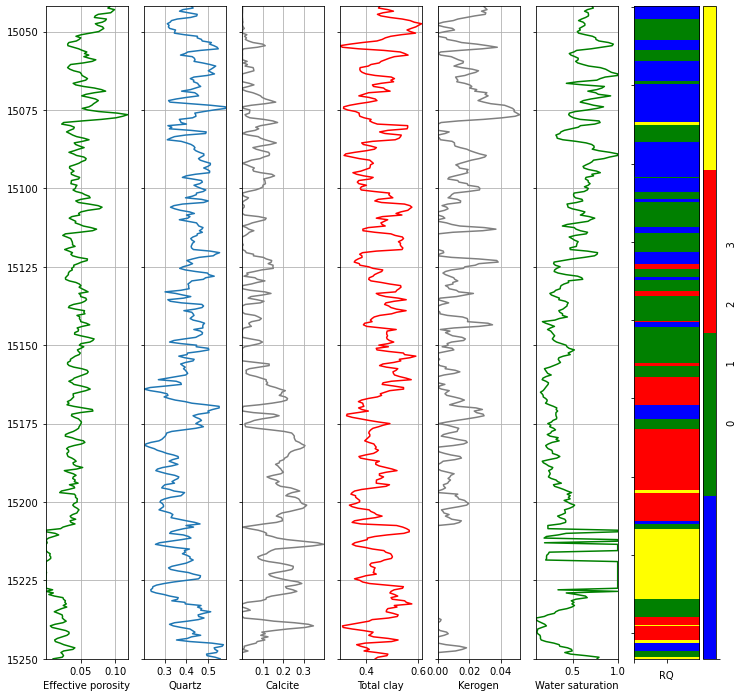

In [38]:
make_facies_log_plot(
    df_rq_cluster,
    facies_colors)

## RQI las file

In [383]:
df_rql.reset_index(inplace=True)
df_rql.head()

,MD,BHC,CBW,CGIP_FREE,DGD,EPOR,ERR_TRA,GAS_SAT,GFP,GIP_FREE,H2O_SAT,OIL_SAT,PERM_PRES,RQI,TOC
0,14000.0,0.389311,1.725230,141.4955,2.715247,1.745814,28.05430,54.65510,1.182147,39.26133,27.66153,21.51024,0.000094,104.0,1.009732
1,14000.5,0.400633,1.587397,141.4502,2.713212,1.755866,28.49109,54.61265,1.183875,39.48919,27.40098,21.69207,0.000095,104.0,0.976730
2,14001.0,0.390956,1.689737,141.4047,2.714426,1.760759,28.06528,53.84951,1.163321,39.10029,28.25747,21.51619,0.000095,104.0,0.953714
3,14001.5,0.384353,1.750642,141.3598,2.715524,1.817945,29.20753,53.50878,1.170296,40.19756,28.11625,22.01708,0.000096,104.0,0.938023
4,14002.0,0.370350,2.050918,141.3136,2.715595,1.964483,29.74136,53.24891,1.205841,43.30813,27.60061,22.81037,0.000097,104.0,0.933716


In [385]:
df_rql_tms=df_rql.loc[(df_rql['MD'] >= 15042) & (df_rql['MD'] <= 15250)]
df_rql_tms

,MD,BHC,CBW,CGIP_FREE,DGD,EPOR,ERR_TRA,GAS_SAT,GFP,GIP_FREE,H2O_SAT,OIL_SAT,PERM_PRES,RQI,TOC
2084,15042.0,0.472520,11.765790,43.88491,2.685111,4.362833,5.797662,31.18155,1.412263,59.12231,57.92923,12.432230,0.000076,105.0,1.487952
2085,15042.5,0.461314,11.963540,43.81945,2.689099,4.046335,7.568802,30.98639,1.428683,54.46119,57.46251,12.538410,0.000071,105.0,1.471319
2086,15043.0,0.441081,10.884750,43.75912,2.687330,3.944090,9.825785,30.86937,1.439000,53.13327,54.61376,12.086370,0.000070,105.0,1.438898
2087,15043.5,0.377530,10.717460,43.70053,2.686264,4.098580,9.282612,31.18507,1.437921,55.59302,54.53816,10.712250,0.000073,105.0,1.327429
2088,15044.0,0.422650,10.867270,43.63903,2.682793,4.410703,8.055770,31.36934,1.421123,60.24004,55.80913,11.265860,0.000078,105.0,1.401996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,15248.0,0.257741,12.146410,18.00970,2.717960,3.046941,3.062648,32.93608,0.938370,41.64805,59.78148,6.019366,0.000066,103.0,0.738141
2497,15248.5,0.255867,11.949910,17.96130,2.720592,2.824795,3.972642,29.61095,0.777311,34.67815,64.15443,4.890540,0.000063,103.0,0.643190
2498,15249.0,0.243194,11.208360,17.92096,2.725296,2.573417,4.893476,27.72260,0.649072,29.55760,66.15751,5.068779,0.000063,102.0,0.574493
2499,15249.5,0.284427,9.235485,17.88655,2.724085,2.209846,8.629101,29.48170,0.592994,27.02963,63.41652,6.569316,0.000066,102.0,0.527823


In [386]:
df_rql_tms["RQI"].value_counts()

105.0    238
104.0    133
103.0     33
102.0     13
Name: RQI, dtype: int64

In [393]:
def rql_props(df,i):
    df_rq=df[df["RQI"]==i]
    return df_rq[['EPOR','H2O_SAT','OIL_SAT','PERM_PRES','TOC']].describe()

In [395]:
rql_props(df_rql_tms,102)

,EPOR,H2O_SAT,OIL_SAT,PERM_PRES,TOC
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.124959,68.616566,2.132186,0.000059,0.670201
std,0.434644,3.573678,2.544991,0.000004,0.076395
min,1.586311,61.762260,-1.039802,0.000054,0.527823
25%,1.673266,66.157510,0.586318,0.000056,0.665896
50%,2.168422,70.063720,1.297724,0.000057,0.690310
75%,2.573417,71.029880,3.464442,0.000060,0.714647
max,2.722072,71.913010,6.569316,0.000066,0.794855


In [396]:
rql_props(df_rql_tms,103)

,EPOR,H2O_SAT,OIL_SAT,PERM_PRES,TOC
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.405086,55.212169,8.991754,0.000074,0.558814
std,0.538655,11.185542,7.072943,0.000013,0.119808
min,2.361512,35.810920,0.478577,0.000057,0.233144
25%,3.046941,46.355690,4.149959,0.000066,0.512849
50%,3.488526,52.915940,6.441388,0.000070,0.581151
75%,3.797858,66.057720,12.762090,0.000079,0.647312
max,4.528680,70.517210,24.476650,0.000106,0.738141


In [397]:
rql_props(df_rql_tms,104)

,EPOR,H2O_SAT,OIL_SAT,PERM_PRES,TOC
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,3.892829,59.102117,8.250456,0.000072,0.895486
std,0.639045,4.725125,1.944397,0.000008,0.108523
min,1.664939,37.786230,2.656200,0.000056,0.636010
25%,3.452316,57.497130,7.095851,0.000065,0.805990
50%,3.931810,59.767070,8.324741,0.000070,0.900715
75%,4.277208,61.960940,9.645755,0.000076,0.985729
max,5.032656,68.466010,13.414270,0.000095,1.201813


In [398]:
rql_props(df_rql_tms,105)

,EPOR,H2O_SAT,OIL_SAT,PERM_PRES,TOC
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.732721,53.275650,10.737731,0.000072,1.248574
std,0.623203,7.879620,4.396456,0.000008,0.150711
min,1.995283,22.320720,2.524129,0.000060,1.030396
25%,3.259783,50.344983,8.234977,0.000065,1.137852
50%,3.720654,54.148410,9.891735,0.000070,1.212447
75%,4.164920,58.747030,11.942943,0.000078,1.324132
max,5.300027,90.091240,27.246480,0.000097,1.850086
